Skewed columns: ['id', 'member_id', 'loan_amount', 'funded_amount', 'funded_amount_inv', 'instalment', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_record', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'collections_12_mths_ex_med']


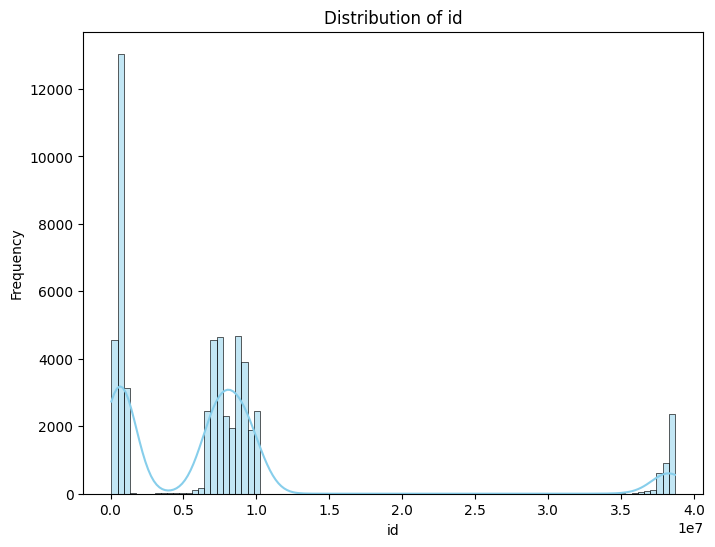

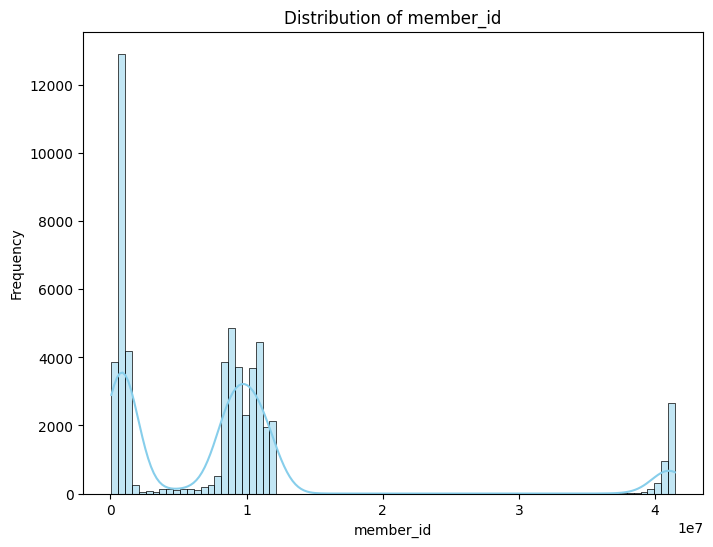

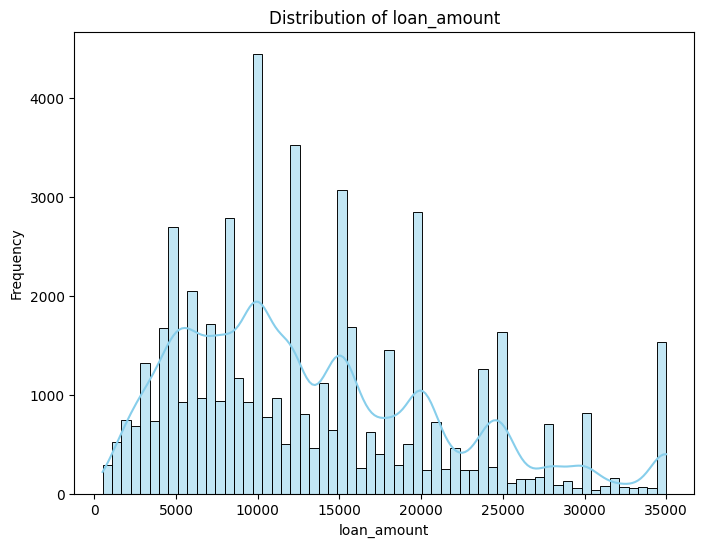

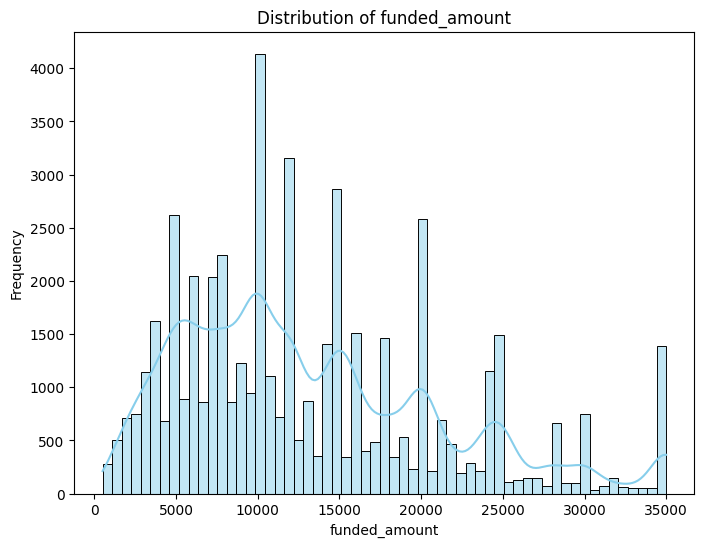

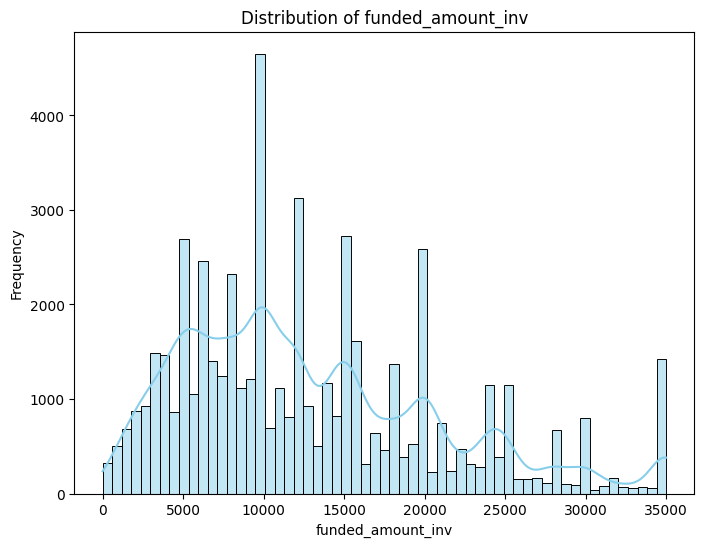

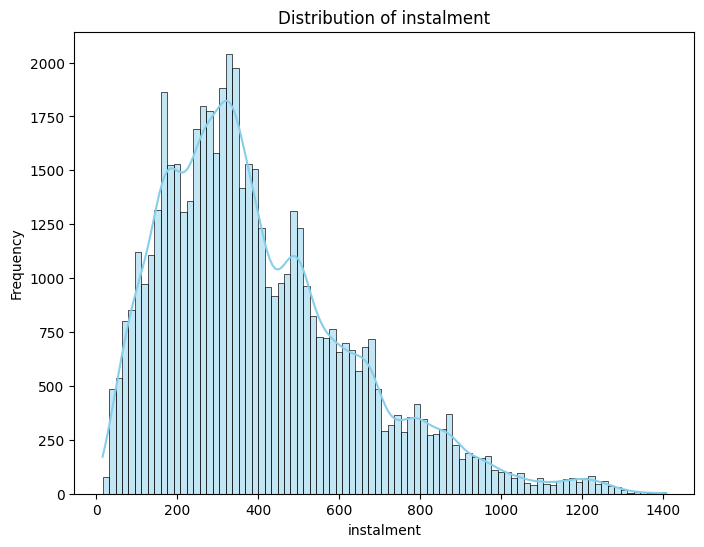

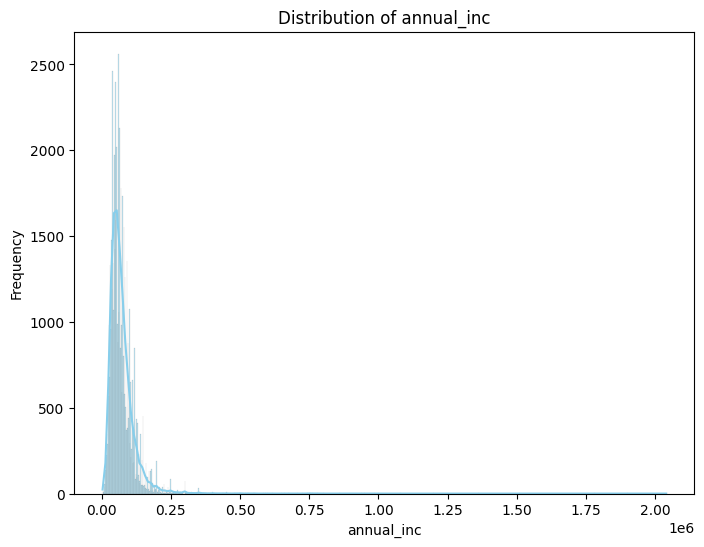

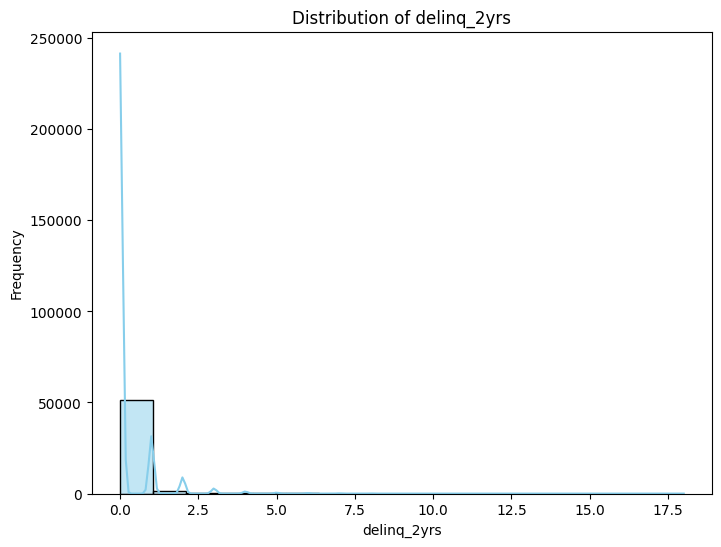

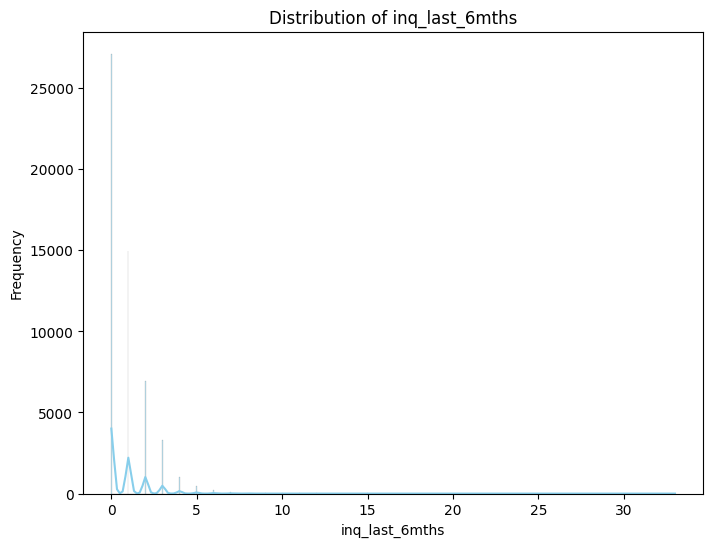

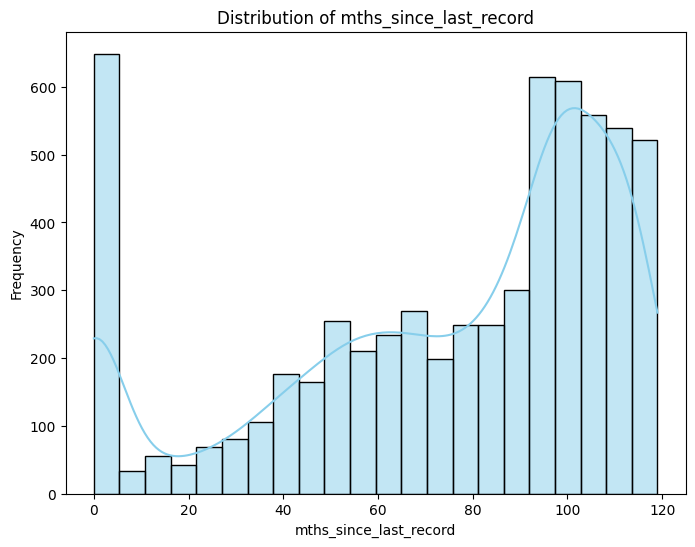

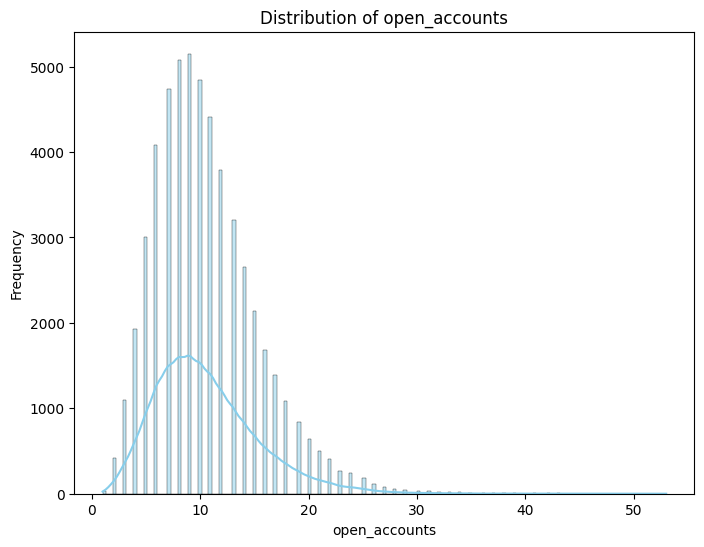

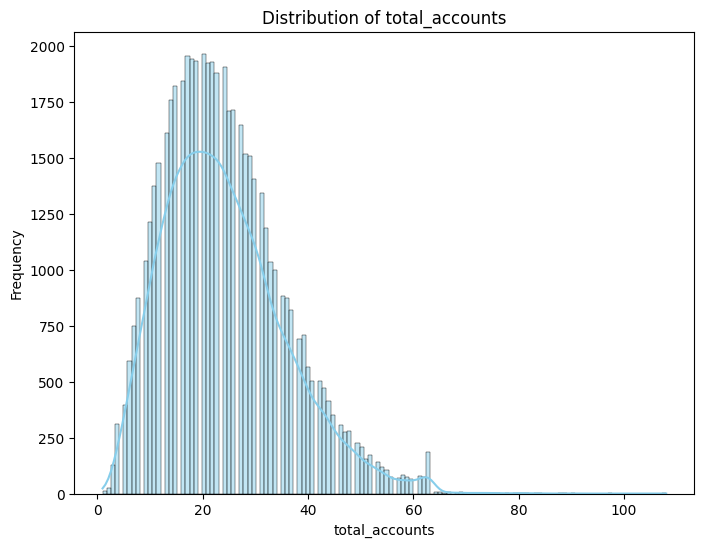

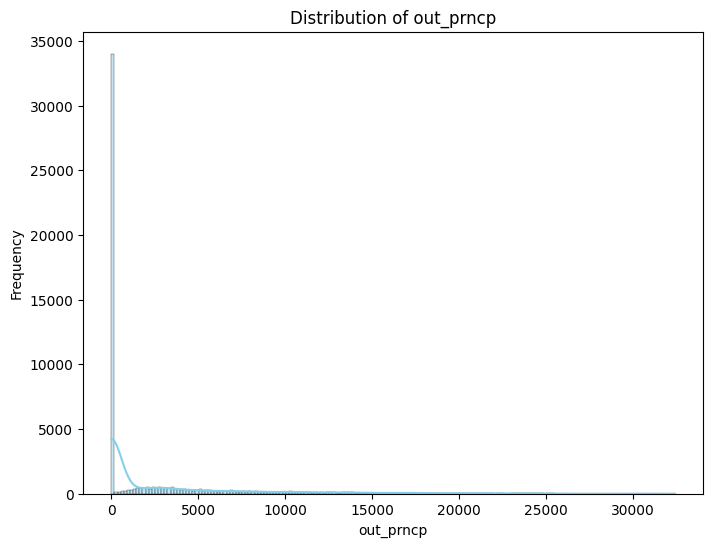

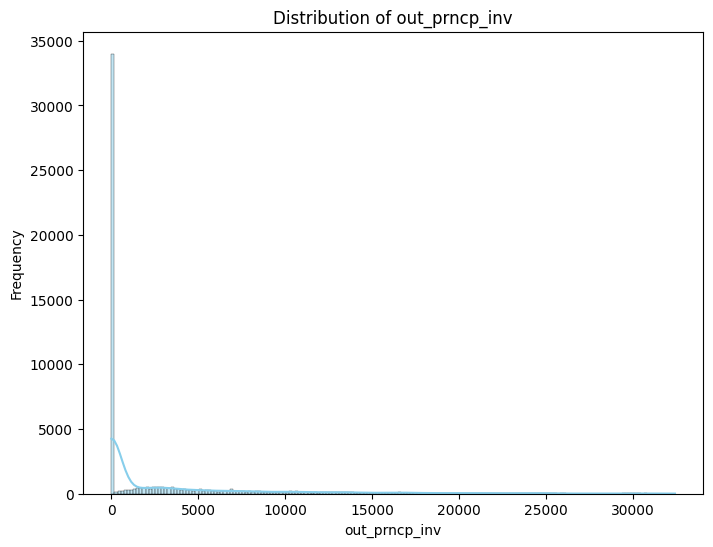

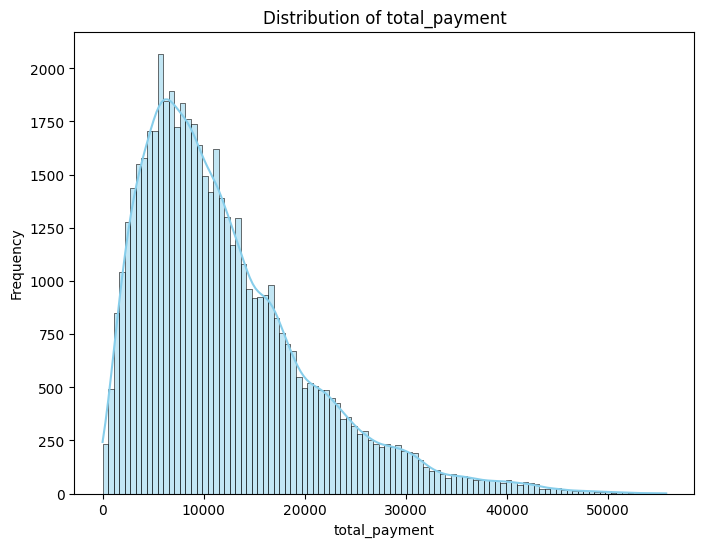

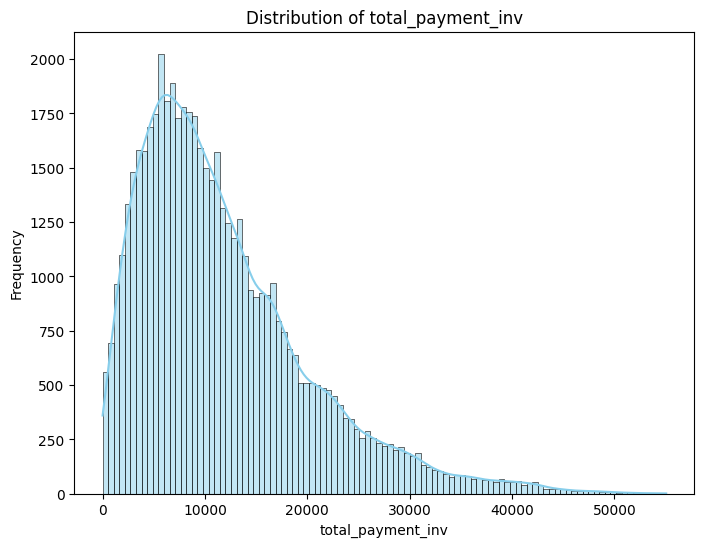

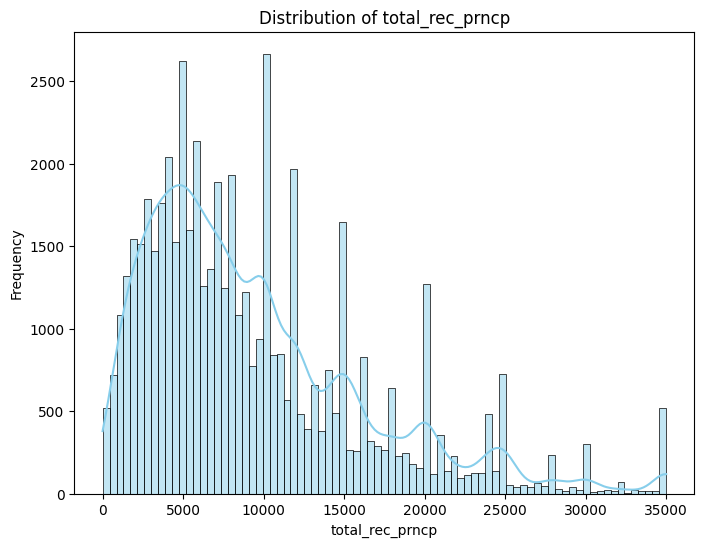

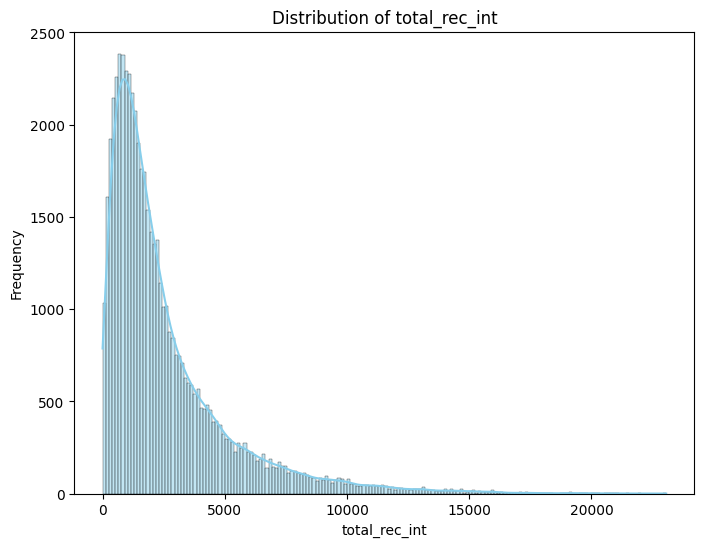

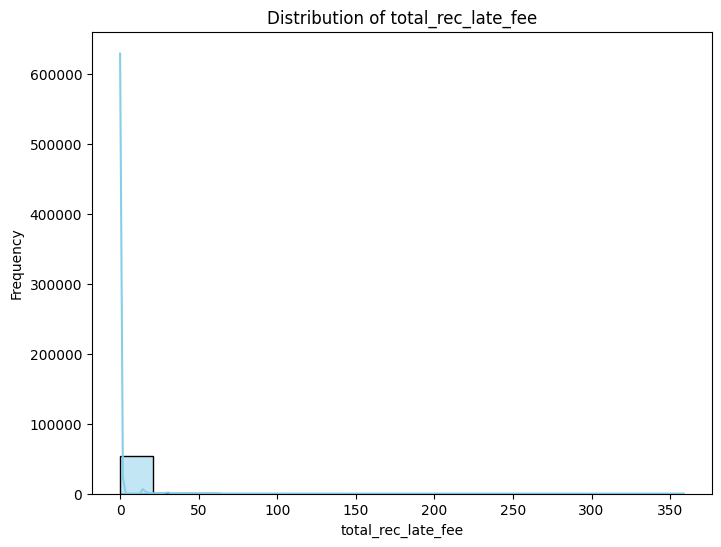

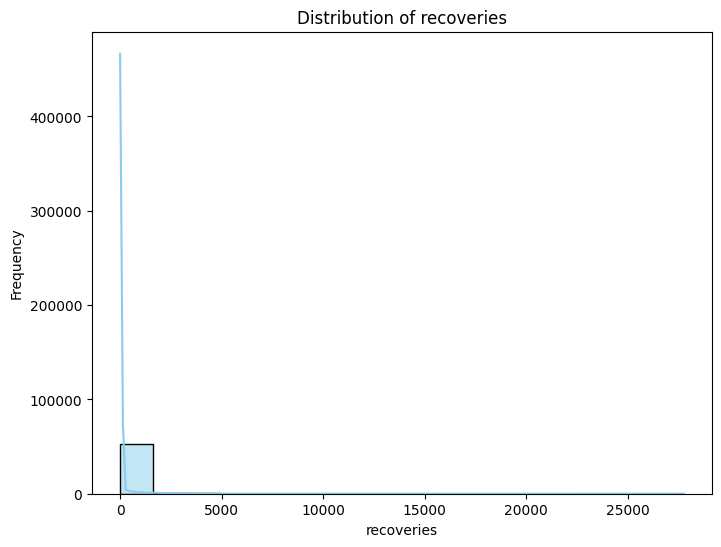

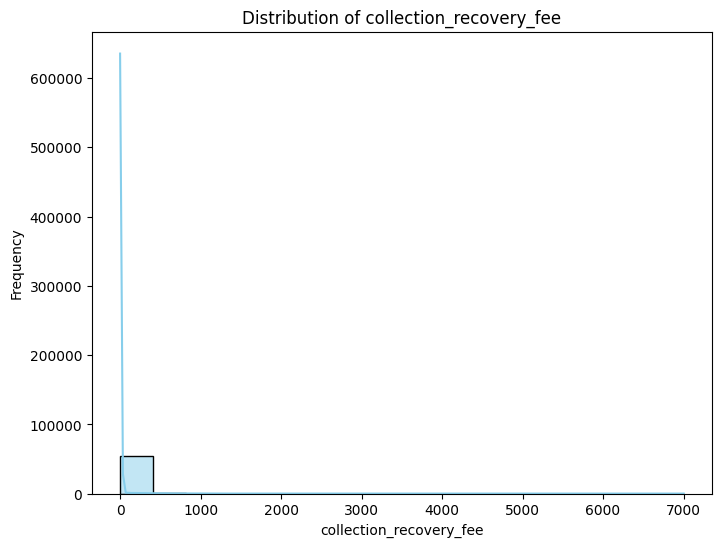

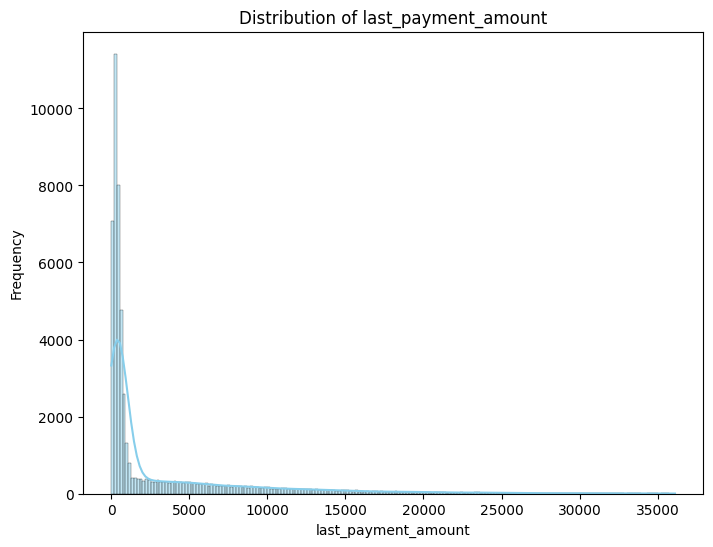

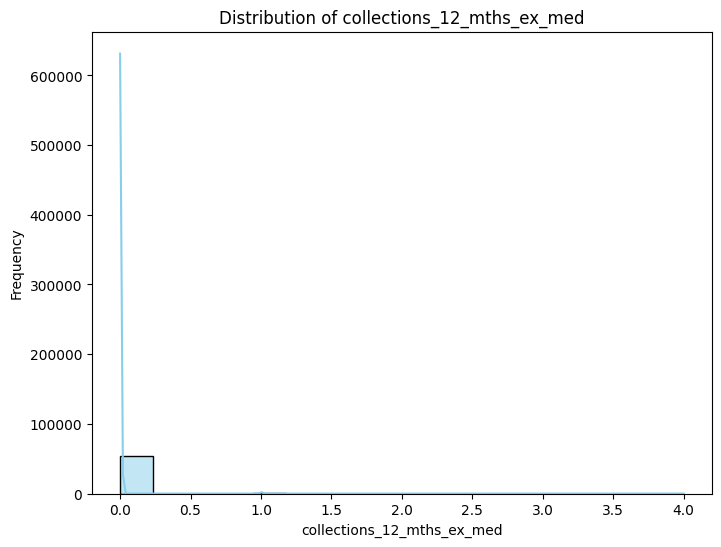

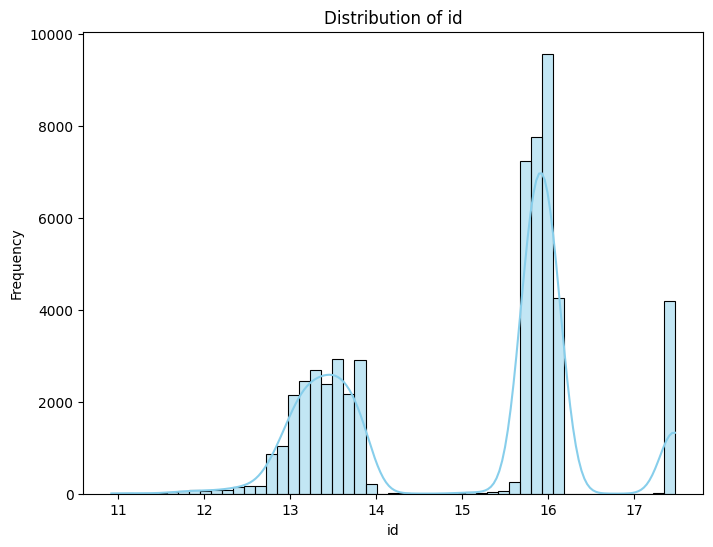

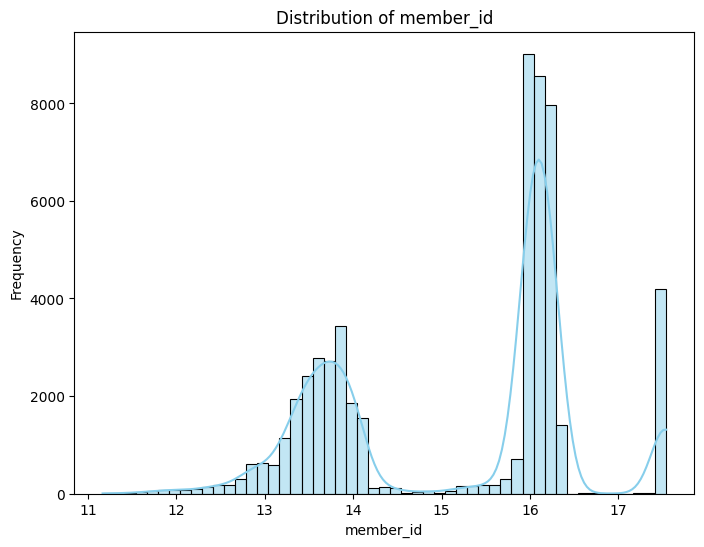

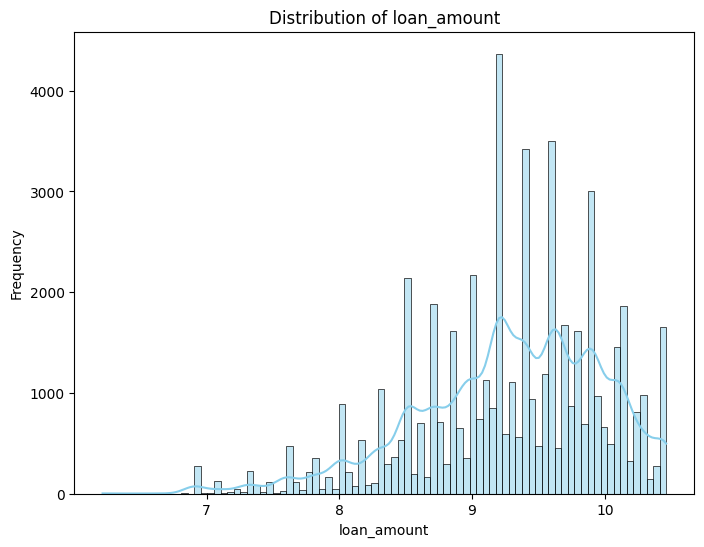

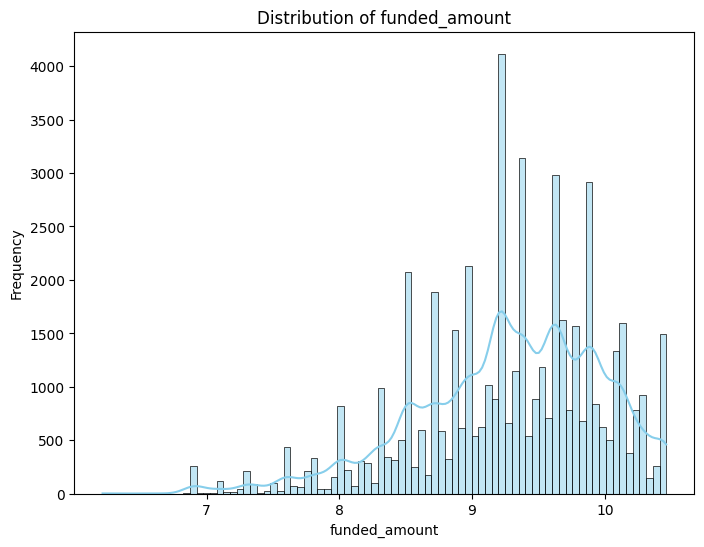

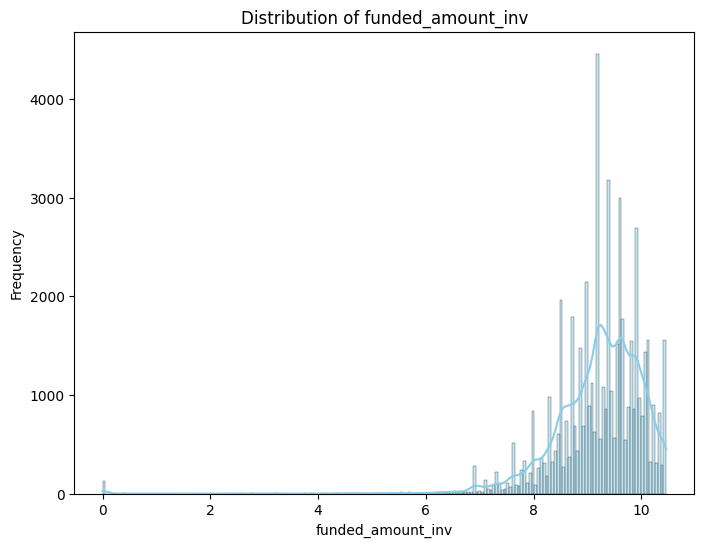

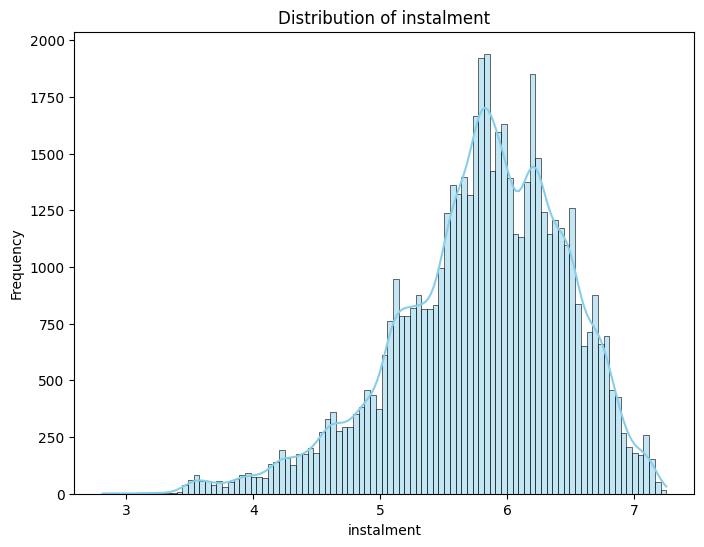

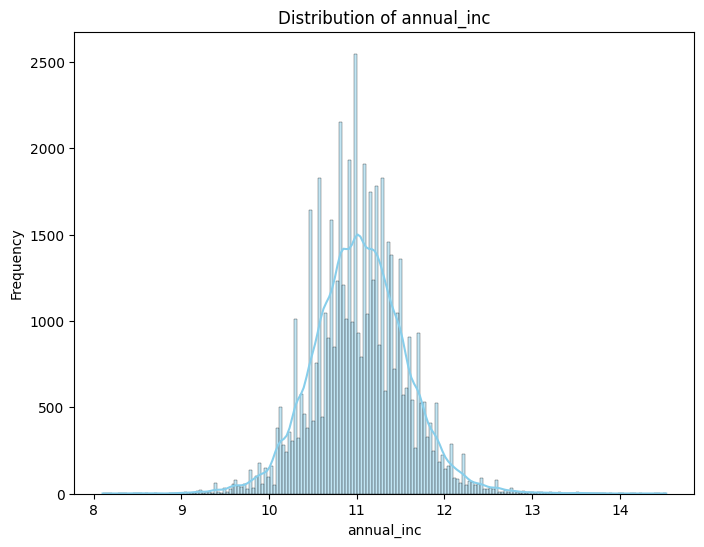

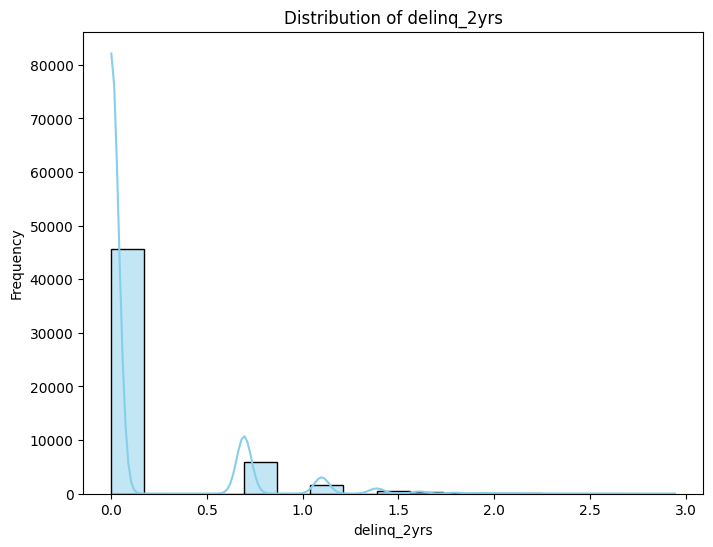

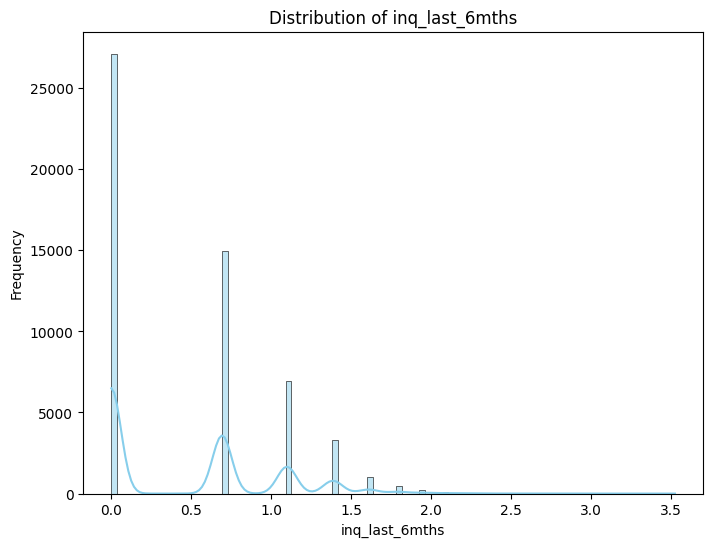

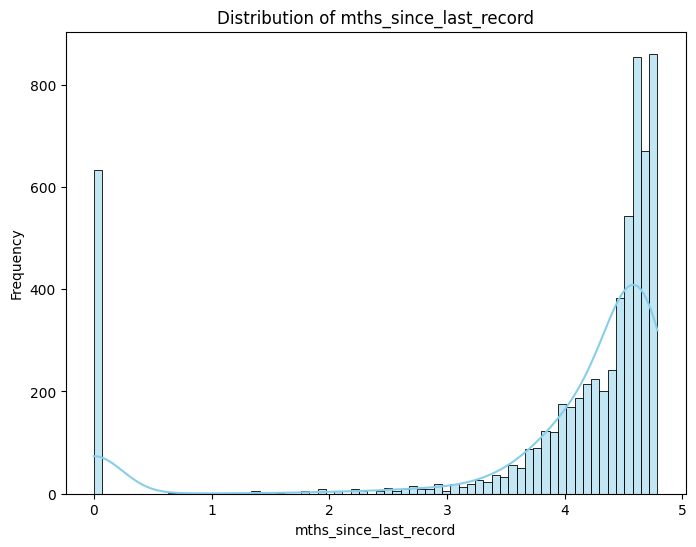

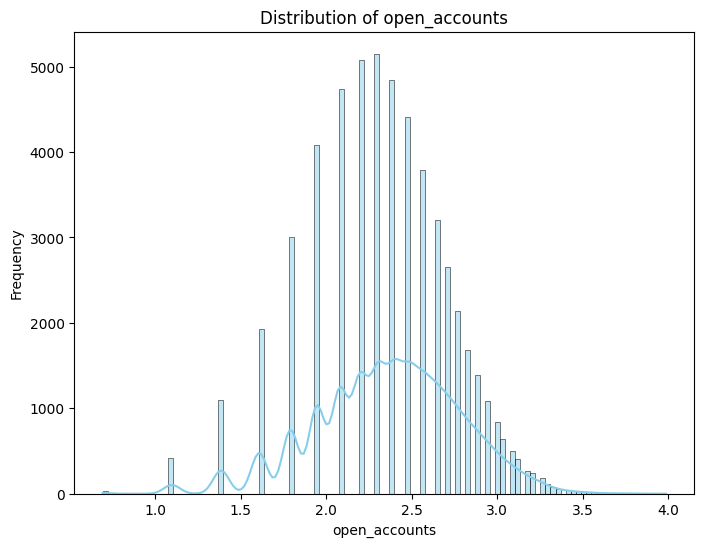

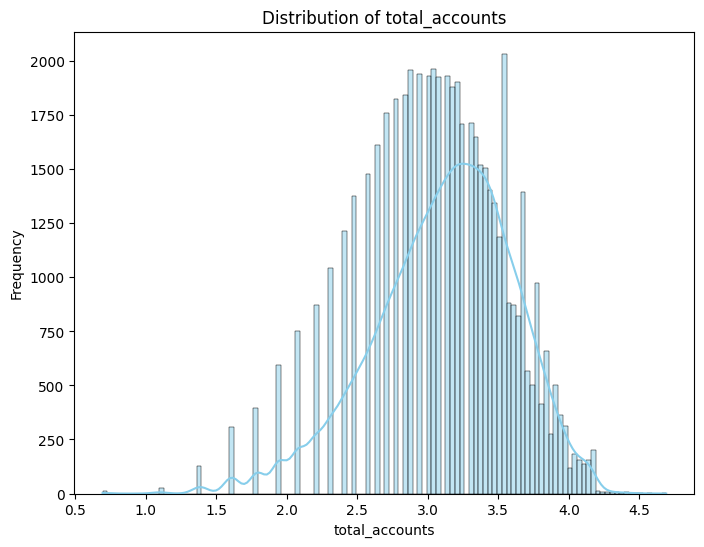

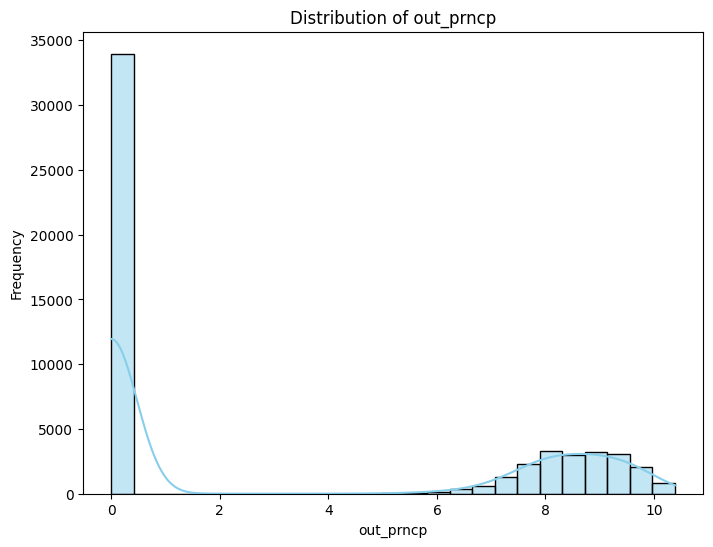

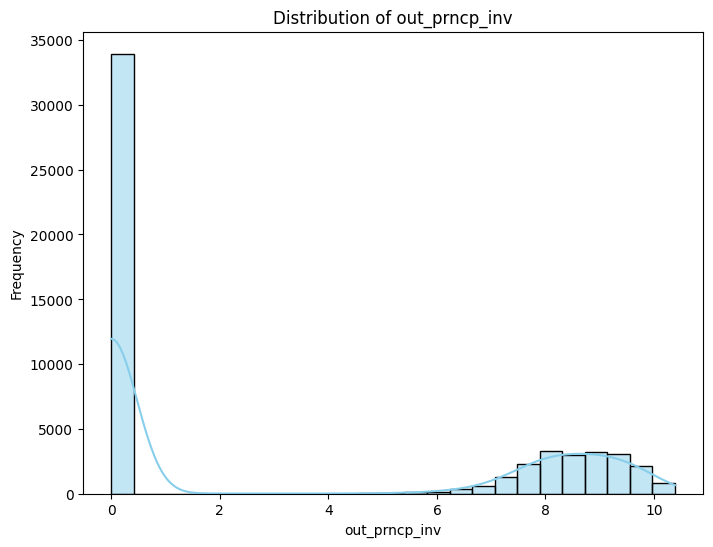

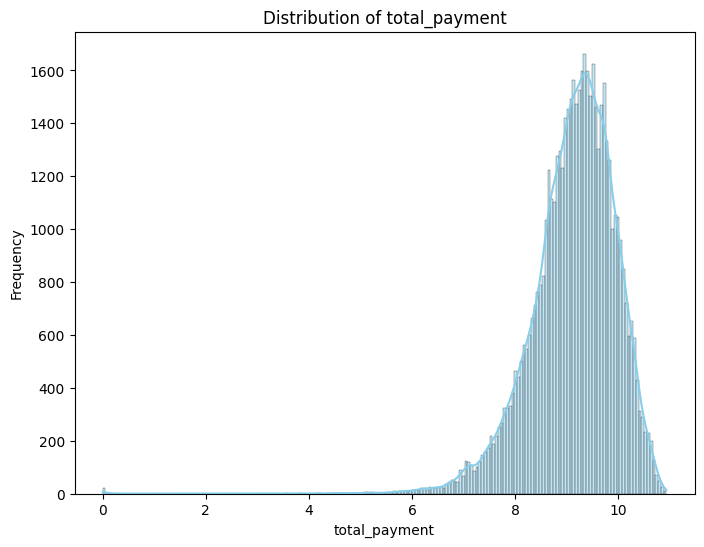

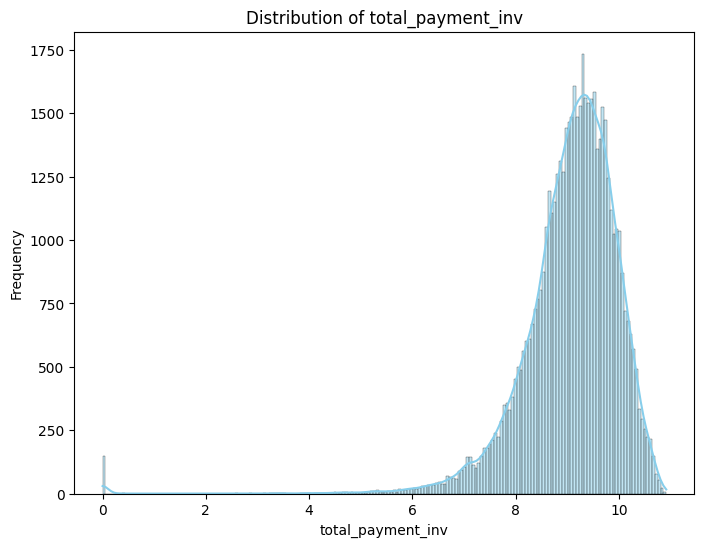

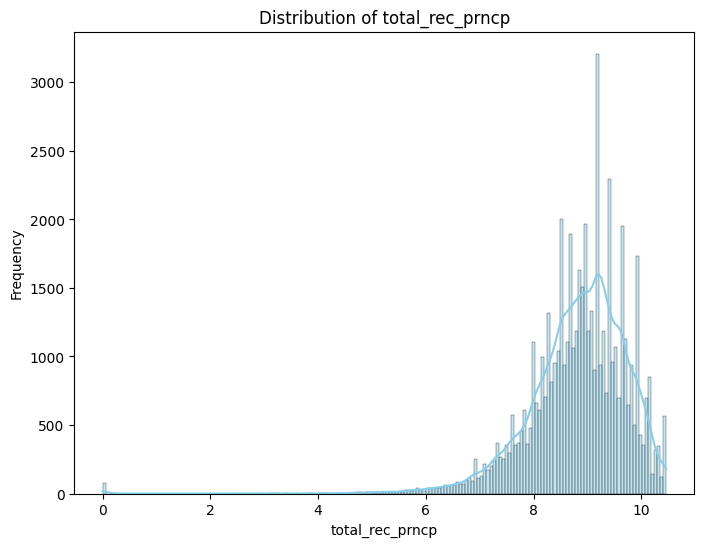

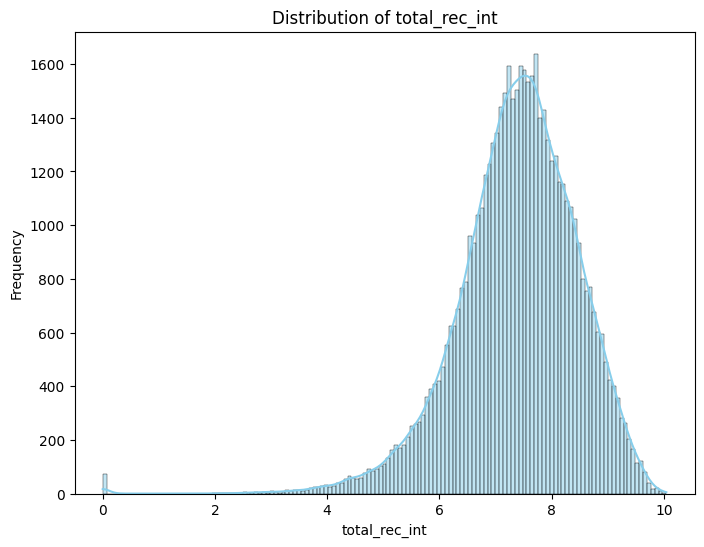

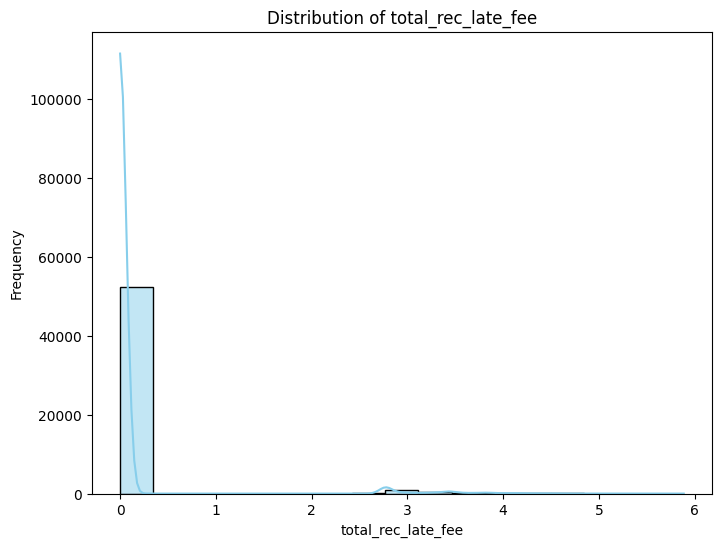

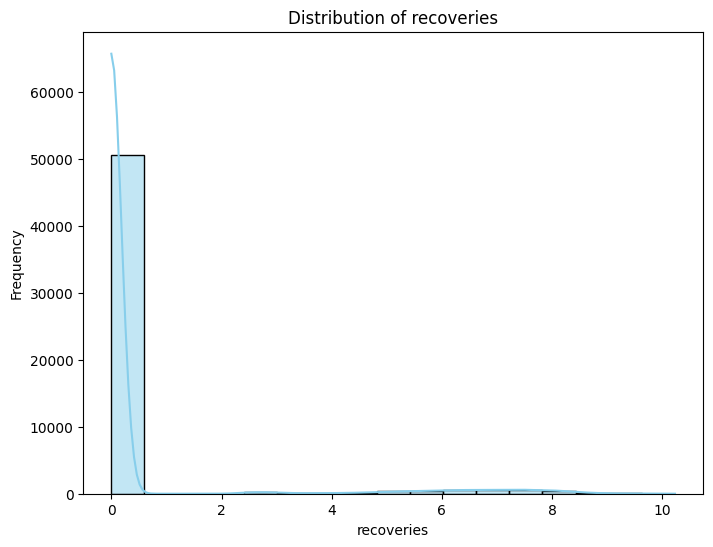

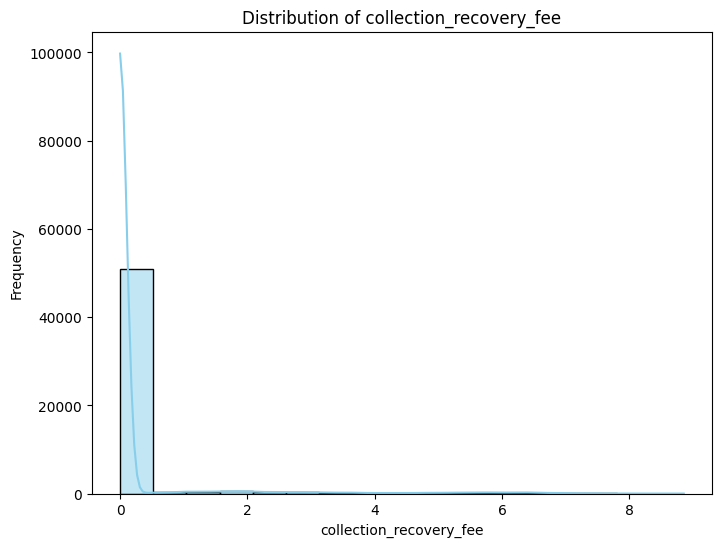

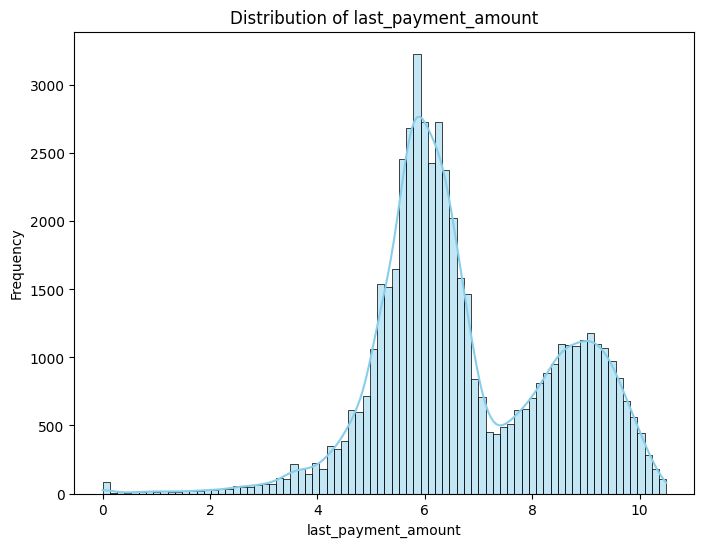

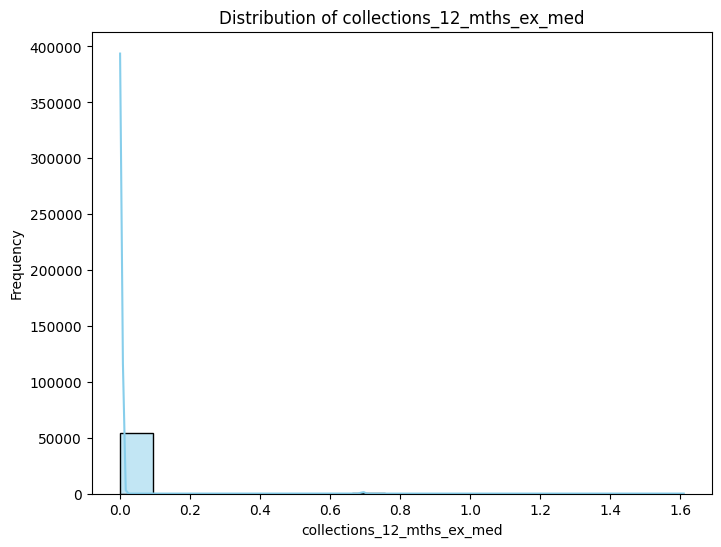

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

class Plotter:
    @staticmethod
    def visualize_distribution(data: pd.Series, column: str) -> None:
        plt.figure(figsize=(8, 6))
        sns.histplot(data, kde=True, color='skyblue')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

class DataFrameTransform:
    @staticmethod
    def identify_skewed_columns(df: pd.DataFrame, skew_threshold: float = 0.5) -> list:
        numeric_df = df.select_dtypes(include=np.number)
        skewness = numeric_df.skew()
        skewed_columns = skewness[abs(skewness) > skew_threshold].index.tolist()
        return skewed_columns

    @staticmethod
    def apply_best_transformation(df: pd.DataFrame, skewed_columns: list) -> pd.DataFrame:
        transformed_df = df.copy()
        for column in skewed_columns:
            if abs(transformed_df[column].skew()) > 0.5:
                transformed_df[column] = np.log1p(transformed_df[column])
        return transformed_df

if __name__ == "__main__":
    # Load DataFrame from CSV file
    file_path = '/Users/fahiyeyusuf/Desktop/CLIF_data.csv'
    df = pd.read_csv(file_path)

    # Example usage:
    # Step 1: Identify skewed columns
    skewed_columns = DataFrameTransform.identify_skewed_columns(df)
    print("Skewed columns:", skewed_columns)

    # Visualize the data using Plotter
    for column in skewed_columns:
        Plotter.visualize_distribution(df[column], column)

    # Step 2: Perform transformations to reduce skew
    df_transformed = DataFrameTransform.apply_best_transformation(df, skewed_columns)

    # Visualize the transformed data
    for column in skewed_columns:
        Plotter.visualize_distribution(df_transformed[column], column)

    # Step 3: Apply transformations to reduce skew
    df = df_transformed.copy()

    # Step 4: Save a separate copy of DataFrame
    df_copy = df.copy()

    # Specify the path where you want to save the new CSV file
    output_csv_path = '/Users/fahiyeyusuf/Desktop/CLIF_data_transformed.csv'

    # Save the DataFrame to a new CSV file
    df_copy.to_csv(output_csv_path, index=False)


Outliers in loan_amount before removal: 1501


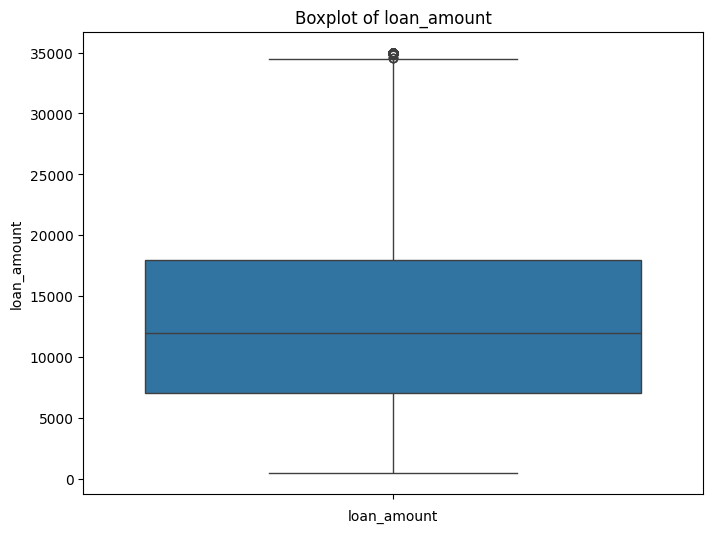

Outliers in funded_amount before removal: 1357


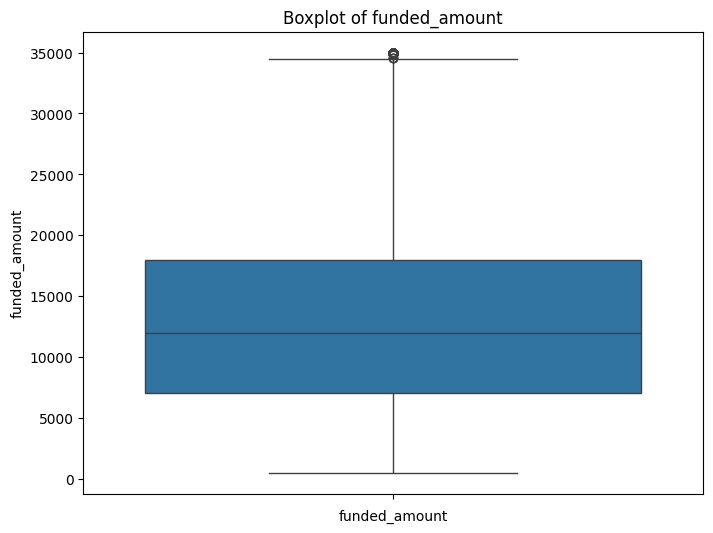

Outliers in funded_amount_inv before removal: 1165


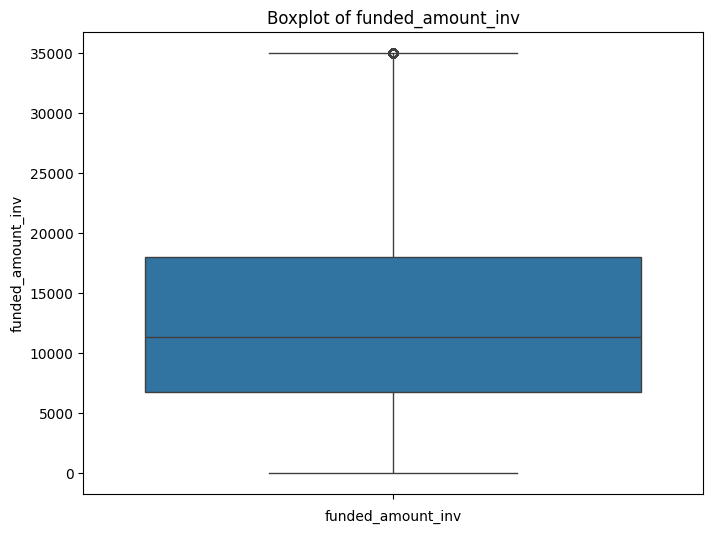

Outliers in annual_inc before removal: 2779


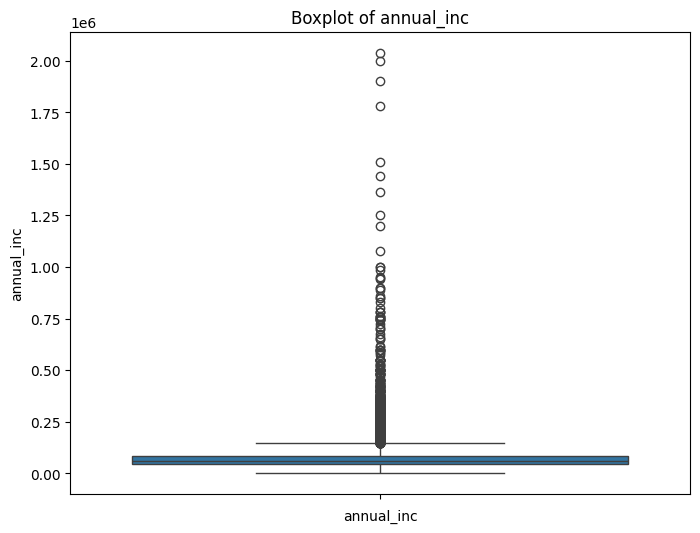

Outliers in delinq_2yrs before removal: 8600


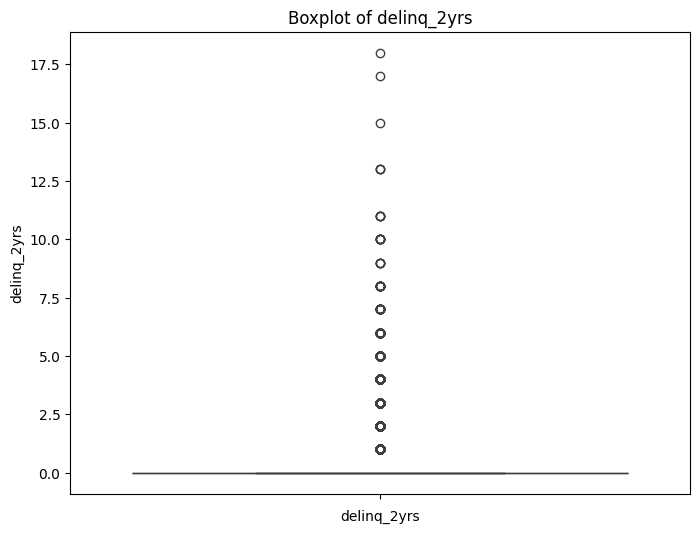

Outliers in inq_last_6mths before removal: 5235


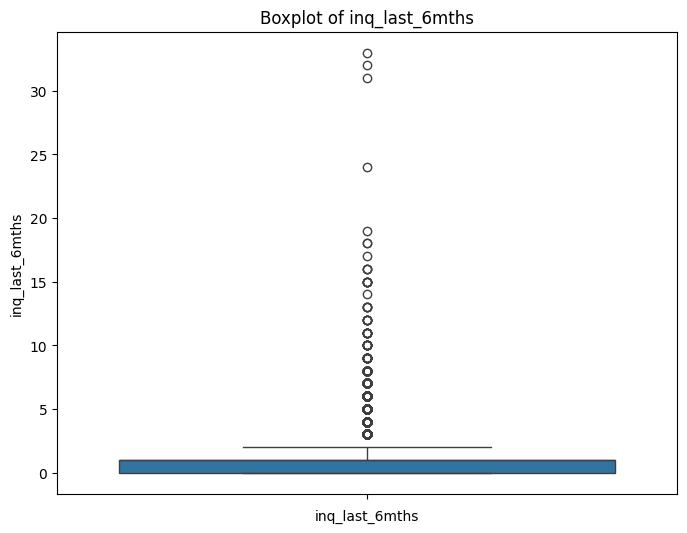

Outliers in int_rate before removal: 453


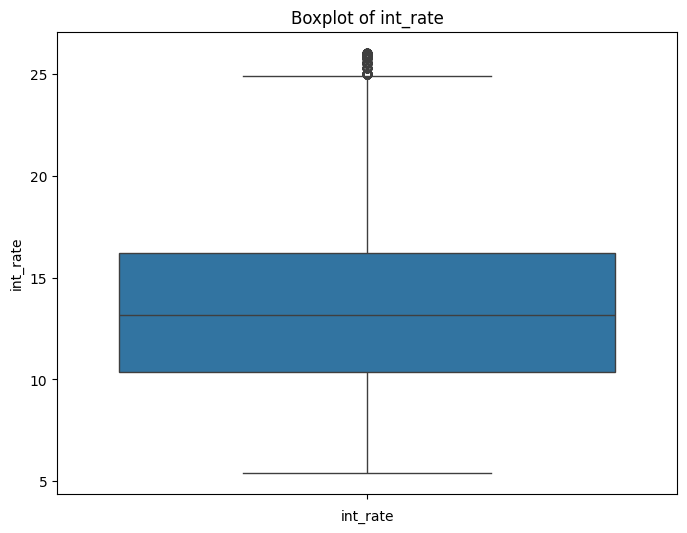

Outliers in instalment before removal: 1300


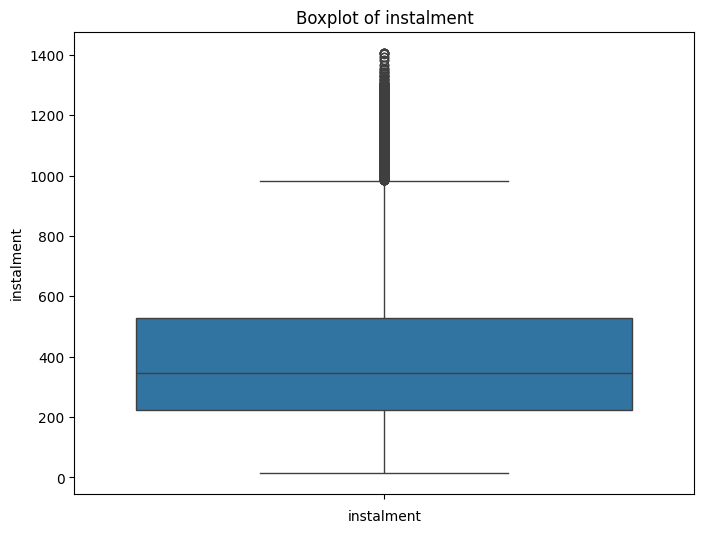

Outliers in mths_since_last_delinq before removal: 9


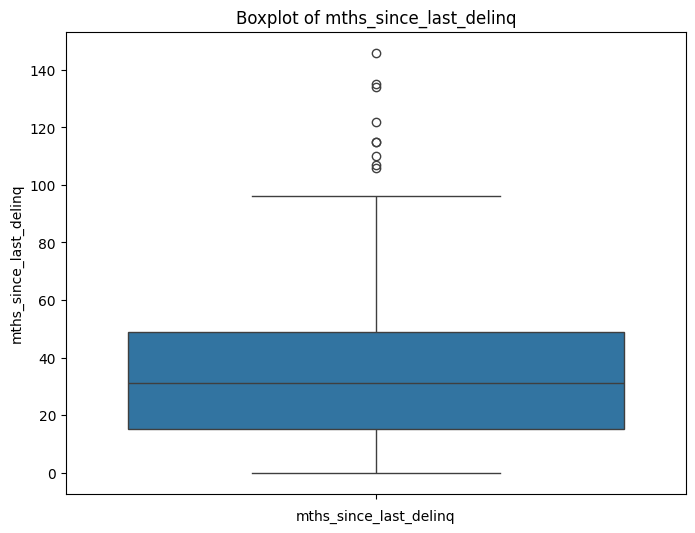

Outliers in open_accounts before removal: 1142


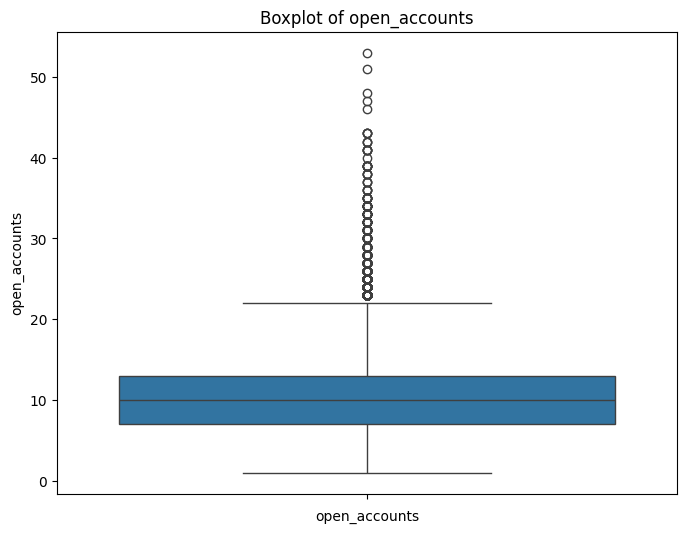

Outliers in total_accounts before removal: 1010


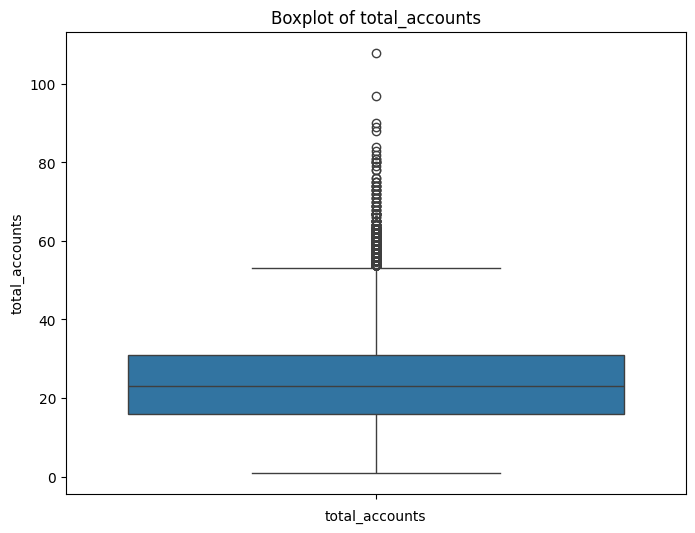

Outliers in out_prncp before removal: 6520


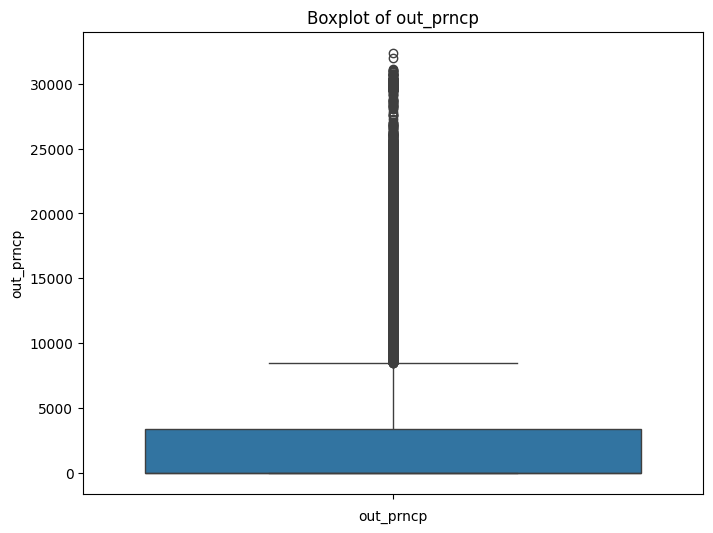

Outliers in out_prncp_inv before removal: 6521


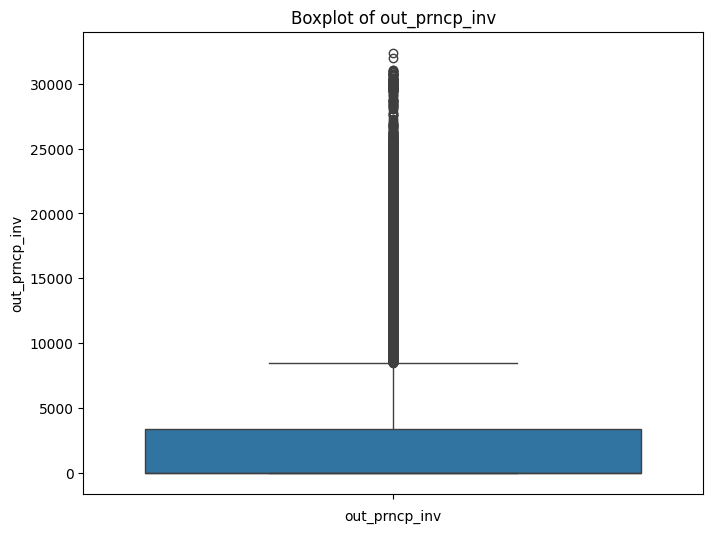

Outliers in total_payment before removal: 1701


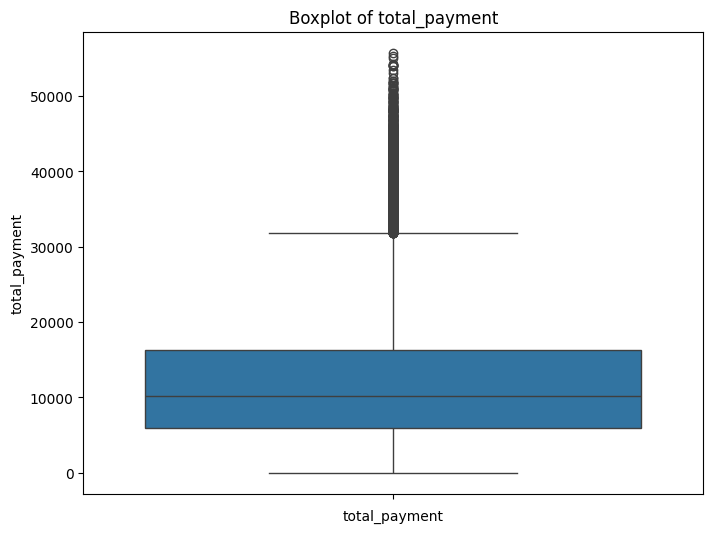

Outliers in total_payment_inv before removal: 1737


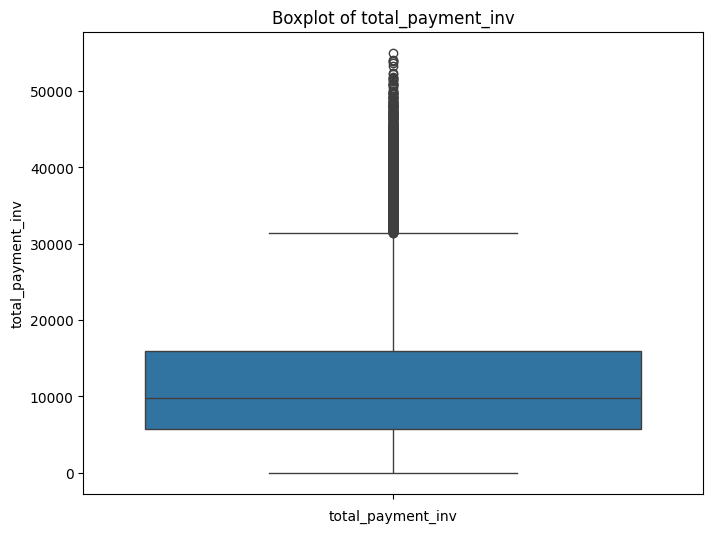

Outliers in total_rec_int before removal: 3729


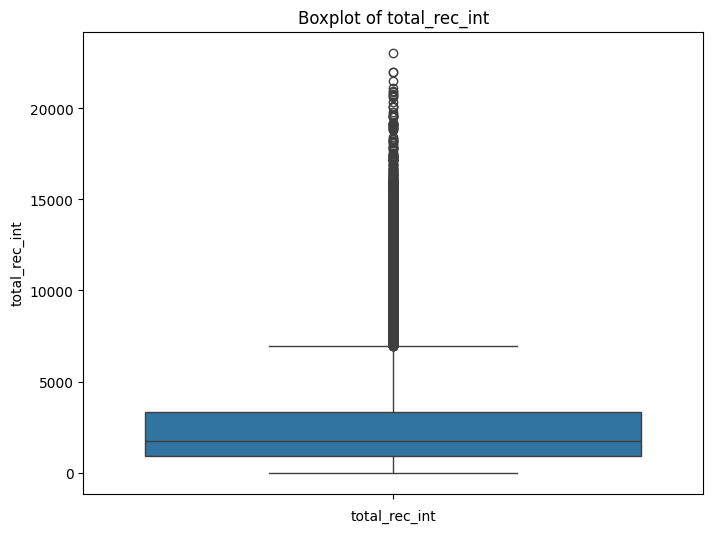

Outliers in total_rec_late_fee before removal: 1761


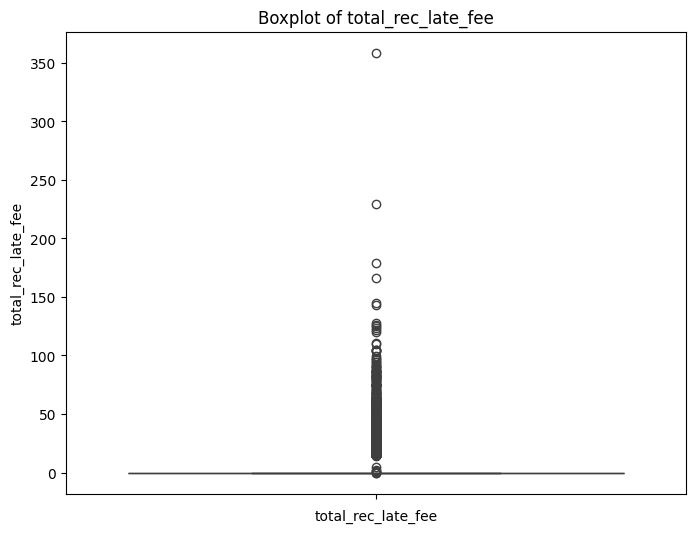

Outliers in recoveries before removal: 3664


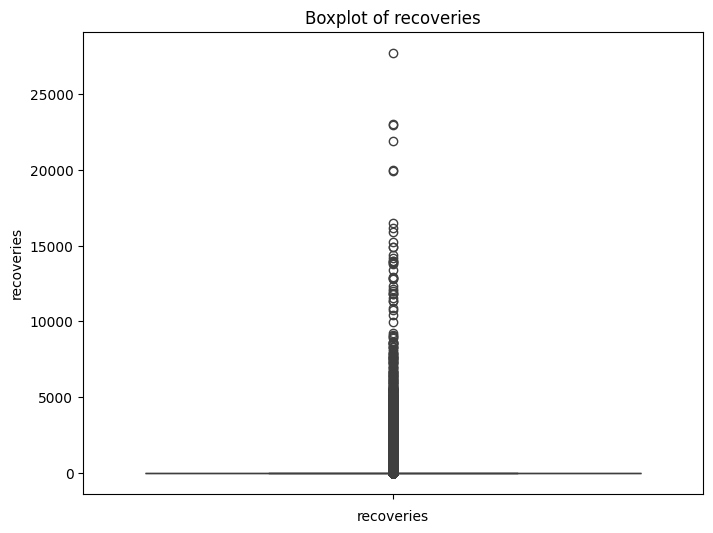

Outliers in collection_recovery_fee before removal: 3443


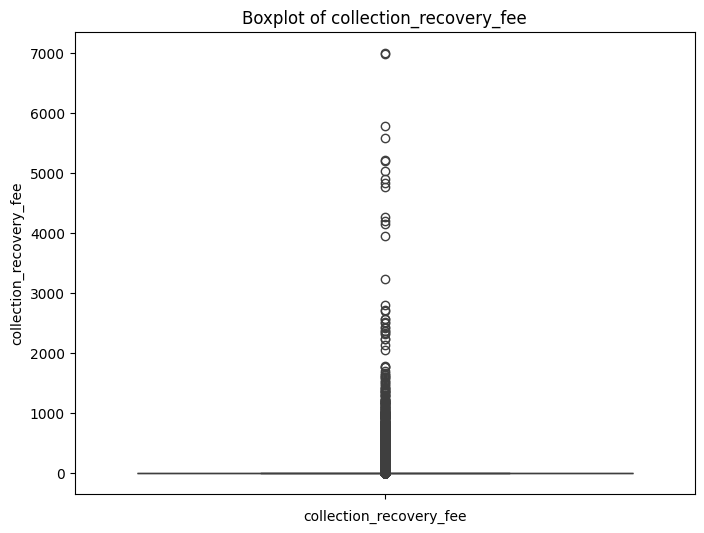

Outliers in collections_12_mths_ex_med before removal: 209


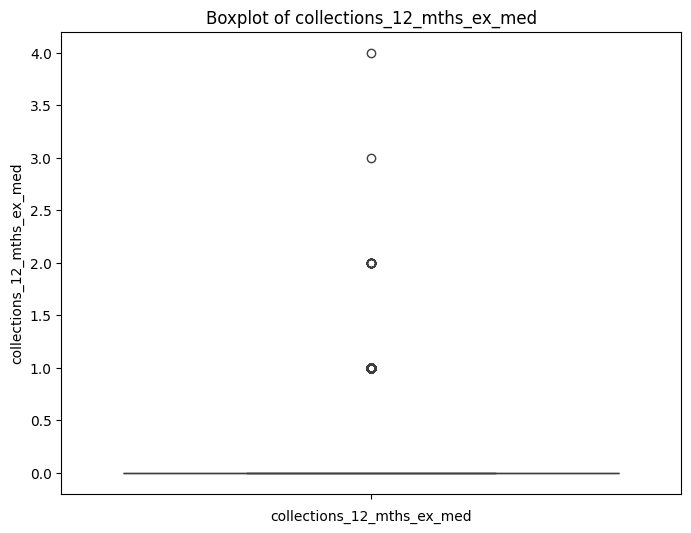

Outliers in mths_since_last_major_derog before removal: 11


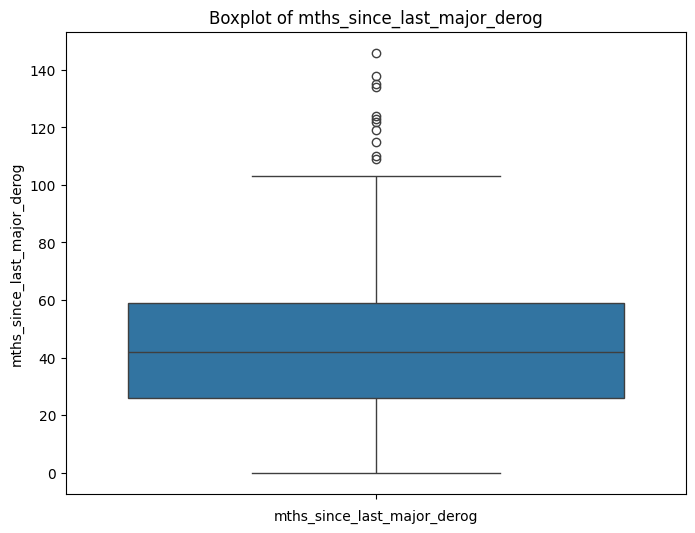

Outliers in dti before removal: 60


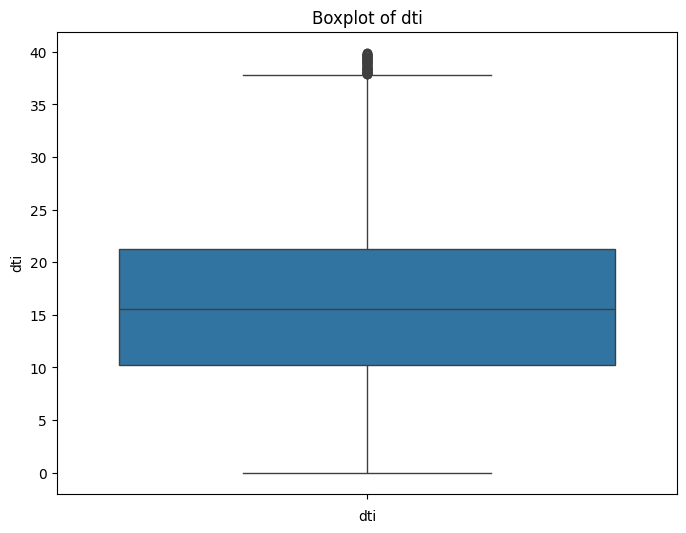

Outliers in loan_amount after removal: 9


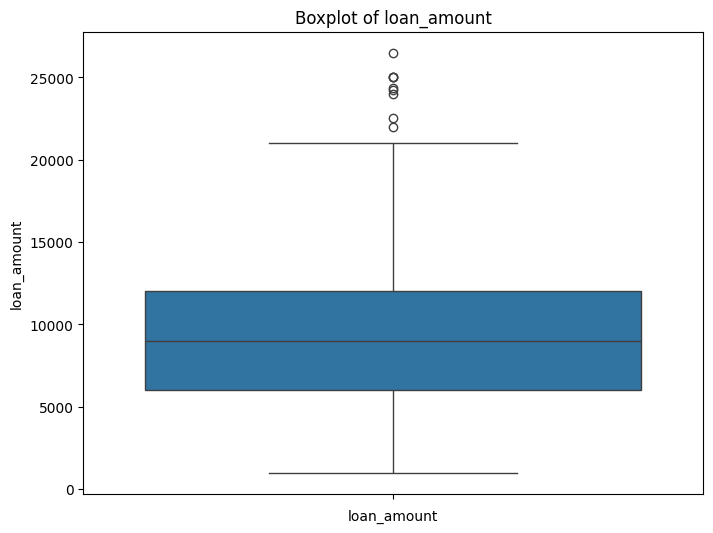

Outliers in funded_amount after removal: 9


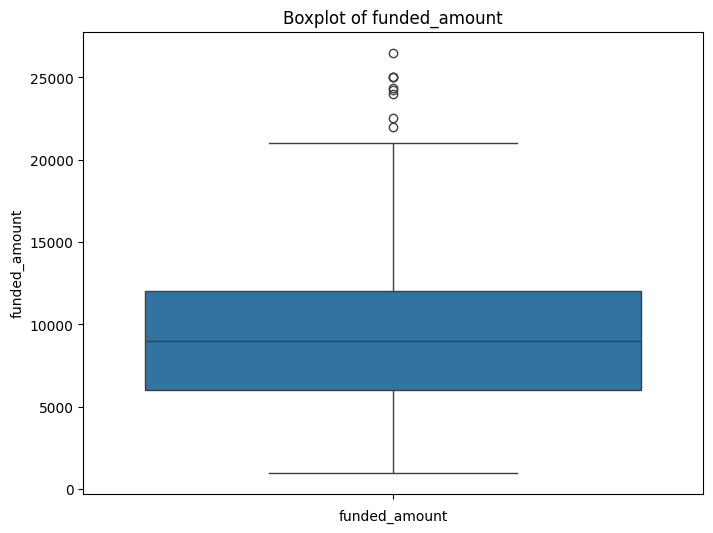

Outliers in funded_amount_inv after removal: 9


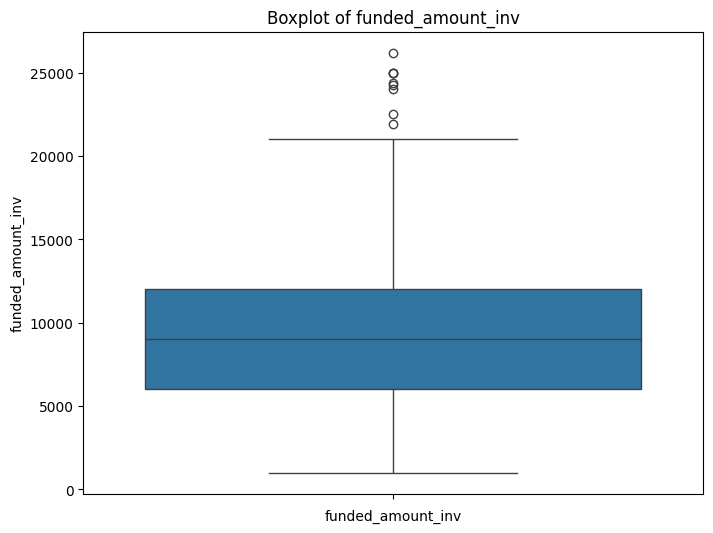

Outliers in annual_inc after removal: 45


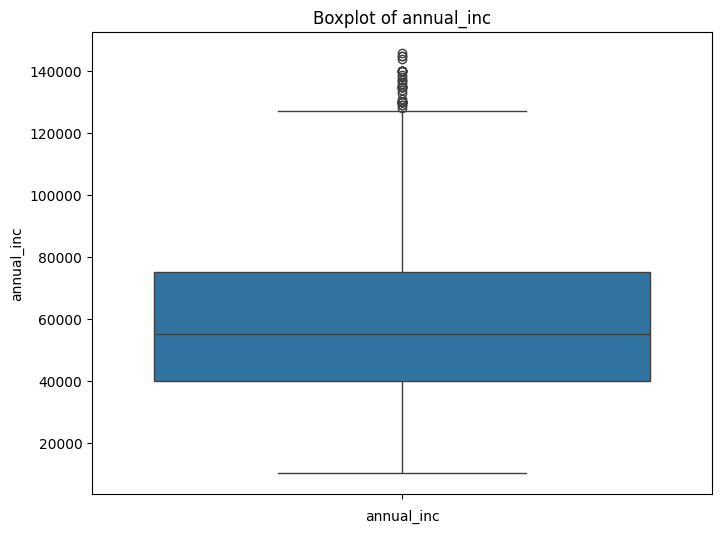

Outliers in int_rate after removal: 10


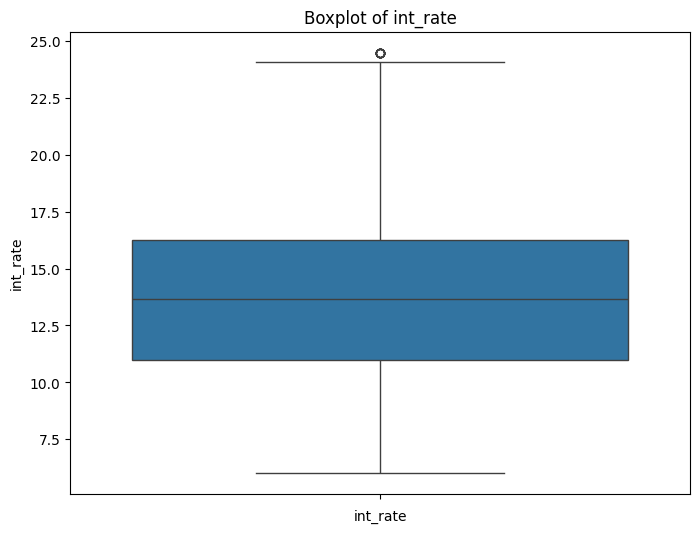

Outliers in instalment after removal: 43


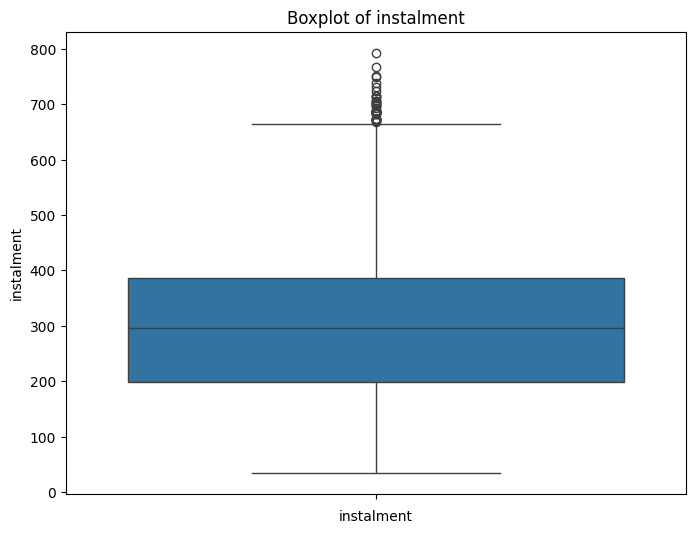

Outliers in total_accounts after removal: 11


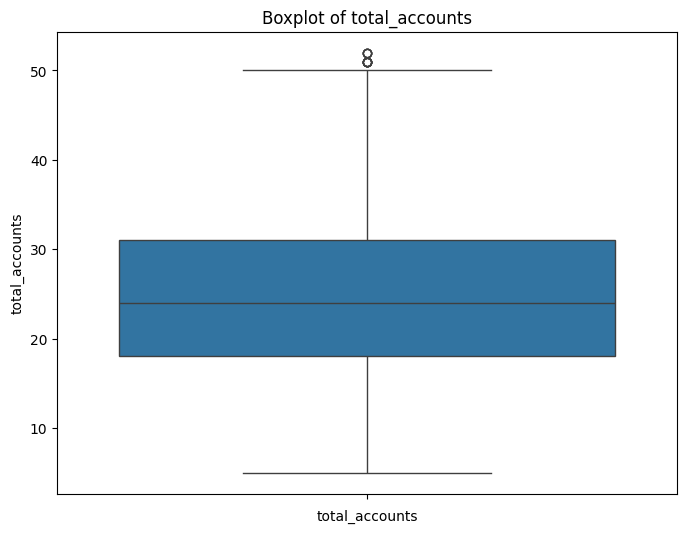

Outliers in total_payment after removal: 32


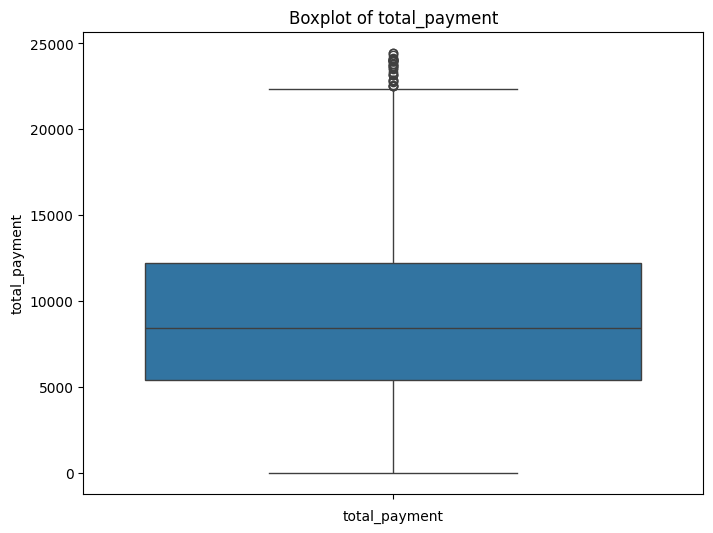

Outliers in total_payment_inv after removal: 32


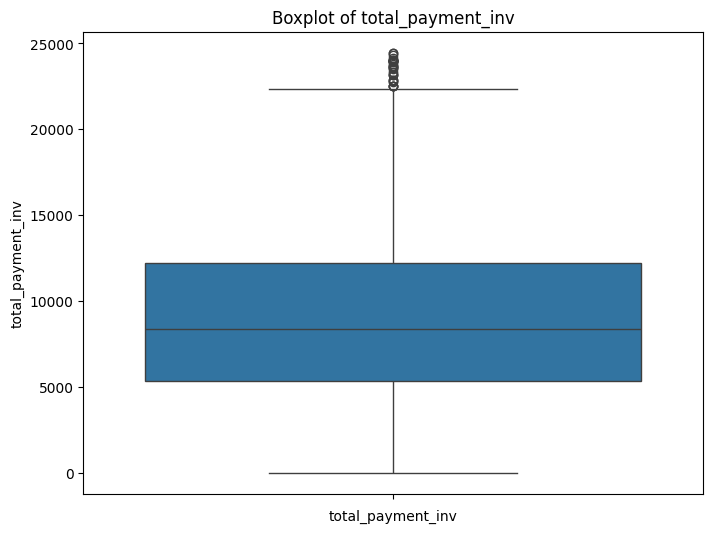

Outliers in total_rec_int after removal: 24


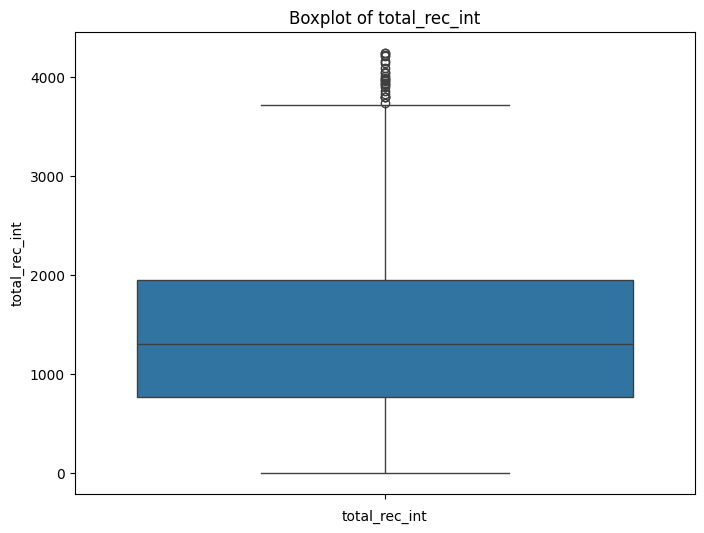

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class Plotter:
    @staticmethod
    def visualize_outliers(data: pd.Series, column: str) -> None:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data[column])
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)
        plt.show()

class DataFrameTransform:
    @staticmethod
    def identify_outliers(df: pd.DataFrame, column: str) -> pd.DataFrame:
        try:
            # Convert column to numeric type and handle missing values
            df[column] = pd.to_numeric(df[column], errors='coerce')
            df = df.dropna(subset=[column])
            
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            return outliers
        except Exception as e:
            print(f"Error processing column '{column}': {e}")
            return pd.DataFrame()

    @staticmethod
    def remove_outliers(df: pd.DataFrame, column: str) -> pd.DataFrame:
        # Convert column to numeric type and handle missing values
        df[column] = pd.to_numeric(df[column], errors='coerce')
        df = df.dropna(subset=[column])
        
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        return df

if __name__ == "__main__":
    # Load DataFrame from CSV file
    file_path = '/Users/fahiyeyusuf/Desktop/CLIF_data.csv'
    df = pd.read_csv(file_path)

    # Example usage:
    # Step 1: Visualize data to identify outliers
    # Before outlier removal
    outlier_columns = ['loan_amount', 'funded_amount', 'funded_amount_inv', 'annual_inc', 'delinq_2yrs',
                       'inq_last_6mths', 'int_rate', 'instalment', 'mths_since_last_delinq', 'open_accounts',
                       'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv',
                       'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                       'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'dti']  # Adjust this list based on visualization

    for column in outlier_columns:
        outliers_before = DataFrameTransform.identify_outliers(df, column)
        if not outliers_before.empty:
            print(f'Outliers in {column} before removal: {len(outliers_before)}')
            Plotter.visualize_outliers(df, column)

    # Step 2: Remove outliers
    for column in outlier_columns:
        df = DataFrameTransform.remove_outliers(df, column)

    # Step 3: Visualize data after removing outliers
    for column in outlier_columns:
        outliers_after = DataFrameTransform.identify_outliers(df, column)
        if not outliers_after.empty:
            print(f'Outliers in {column} after removal: {len(outliers_after)}')
            Plotter.visualize_outliers(df, column)


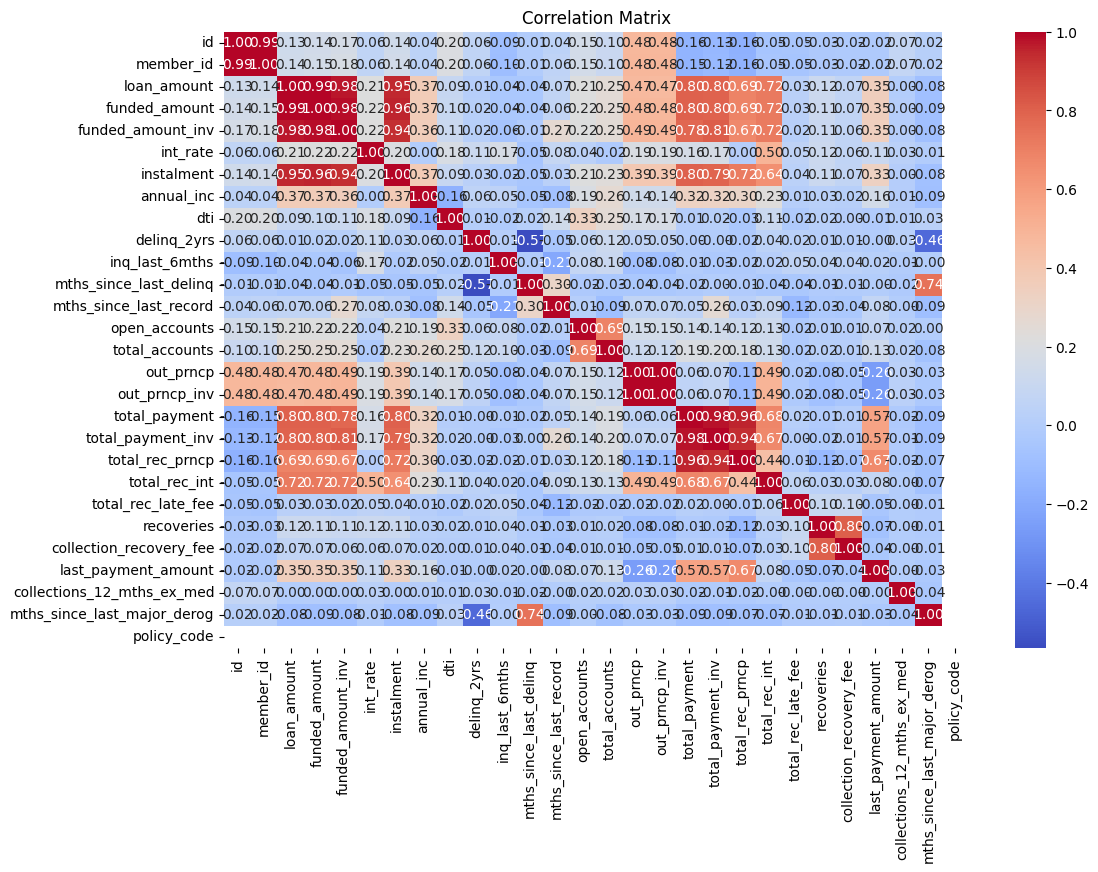

Columns highly correlated and to be removed: ['funded_amount_inv', 'instalment', 'total_payment_inv', 'mths_since_last_major_derog', 'out_prncp_inv', 'out_prncp', 'funded_amount', 'mths_since_last_delinq', 'total_rec_int', 'total_rec_prncp']


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

class DataProcessor:
    def __init__(self, file_path: str):
        self.df = pd.read_csv(file_path)

    def preprocess_data(self, columns_to_exclude: list, correlation_threshold: float = 0.7) -> pd.DataFrame:
        # Drop non-numeric columns or convert them to numeric if possible
        numeric_columns = self.df.select_dtypes(include=[np.number]).columns
        df_numeric = self.df[numeric_columns]

        # Compute the correlation matrix
        correlation_matrix = df_numeric.corr()

        # Visualize the correlation matrix
        self.visualize_correlation(correlation_matrix)

        # Identify highly correlated columns
        highly_correlated_columns = self.identify_highly_correlated(correlation_matrix, columns_to_exclude, correlation_threshold)

        # Decide which columns to remove
        columns_to_remove = list(highly_correlated_columns)
        print("Columns highly correlated and to be removed:", columns_to_remove)

        # Remove highly correlated columns from the dataset
        df_cleaned = self.df.drop(columns=columns_to_remove)

        return df_cleaned

    @staticmethod
    def visualize_correlation(correlation_matrix: pd.DataFrame) -> None:
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Matrix')
        plt.show()

    @staticmethod
    def identify_highly_correlated(correlation_matrix: pd.DataFrame, columns_to_exclude: list, correlation_threshold: float) -> set:
        highly_correlated_columns = set()
        for i in range(len(correlation_matrix.columns)):
            for j in range(i):
                if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
                    colname_i = correlation_matrix.columns[i]
                    colname_j = correlation_matrix.columns[j]
                    if colname_i not in columns_to_exclude and colname_j not in columns_to_exclude:
                        highly_correlated_columns.add(colname_i)
                        highly_correlated_columns.add(colname_j)
        return highly_correlated_columns

if __name__ == "__main__":
    # Step 1: Load the dataset and preprocess it
    file_path = '/Users/fahiyeyusuf/Desktop/CLIF_data.csv'
    columns_to_exclude = ['id', 'loan_amount', 'total_payment', 'recoveries']
    processor = DataProcessor(file_path)
    df_cleaned = processor.preprocess_data(columns_to_exclude)
    
    # Optionally, you can save the cleaned dataset to a new CSV file
    output_csv_path = '/Users/fahiyeyusuf/Desktop/CLIF_data_cleaned.csv'
    df_cleaned.to_csv(output_csv_path, index=False)
